# ML courses 5 & 6 - Practice on logistic regression and classification assessment

We will work here on a data set taken from Scikit-Learn about the characteristics of malignant and benign breast tumors to prevent the risk of cancer.

## Data preparation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

**Loading the data set from Scikit-Learn**

In [2]:
from sklearn.datasets import load_breast_cancer
data_all = load_breast_cancer()

**Checking the keys of the dictionary loaded**   
Sklearn returns the dataset in the form of a dictionary. The actual dataset is stored under 'data', but there are other keys that give access to more information.

In [3]:
data_all.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# Accessing the data and target variables
data = data_all['data']
target = data_all['target']

# Accessing the feature names
feature_names = data_all['feature_names']

# Accessing the target names
target_names = data_all['target_names']

# Accessing the dataset description
description = data_all['DESCR']


**Getting a description of the data set**

In [5]:
print(data_all.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

**Preparing the data frame of all features**

In [6]:
data_all.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
features = pd.DataFrame(data=data_all.data, columns=data_all.feature_names)
features.sample(n=8, random_state=1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.36350,0.3219,0.11080,0.2827,0.09208
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.17860,0.41660,0.5006,0.20880,0.3900,0.11790
292,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,...,13.74,19.93,88.81,585.4,0.14830,0.20680,0.2241,0.10560,0.3380,0.09584
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.3538,0.15710,0.3206,0.06938
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,17.26,36.91,110.10,931.4,0.11480,0.09866,0.1547,0.06575,0.3233,0.06165
132,16.16,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,...,19.47,31.68,129.70,1175.0,0.13950,0.30550,0.2992,0.13120,0.3480,0.07619
161,19.19,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,...,22.03,17.81,146.60,1495.0,0.11240,0.20160,0.2264,0.17770,0.2443,0.06251
197,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.19630,0.2535,0.09181,0.2369,0.06558


**Preparing the data frame of the target**

In [8]:
target = pd.DataFrame(data=data_all.target, columns=['tumor type'])
target.sample(n=8, random_state=1)

,tumor type
421,1
47,0
292,1
186,0
414,0
132,0
161,0
197,0


In [9]:
data_all.target_names

array(['malignant', 'benign'], dtype='<U9')

**To make it easier to do visual check of the data, we remove the encoding. You will have to re-encode the variable a different way later.**

In [10]:
target = target.replace({0:data_all.target_names[0], 1:data_all.target_names[1]})
target.sample(n=8, random_state=1)

,tumor type
421,benign
47,malignant
292,benign
186,malignant
414,malignant
132,malignant
161,malignant
197,malignant


## Your Mission
We have here a large dataset that could help predict if a tumor is benign or malignant based on its characteristics. In this work, we will focus on a small number of features that we will use to train and assess logistic regressions.

<font color=red><b>Questions in red have to be answered only after lecture session 6 (classification assessment).</font>

## We check at first if the tumor radius is a good predictor for breast cancer. 
Starting here, you must use the data contained in the variables `features` and `target` as they were defined in the previous cells.
###   1. Perform data exploration on the variable _mean radius_, taking into account the target class attributions.  

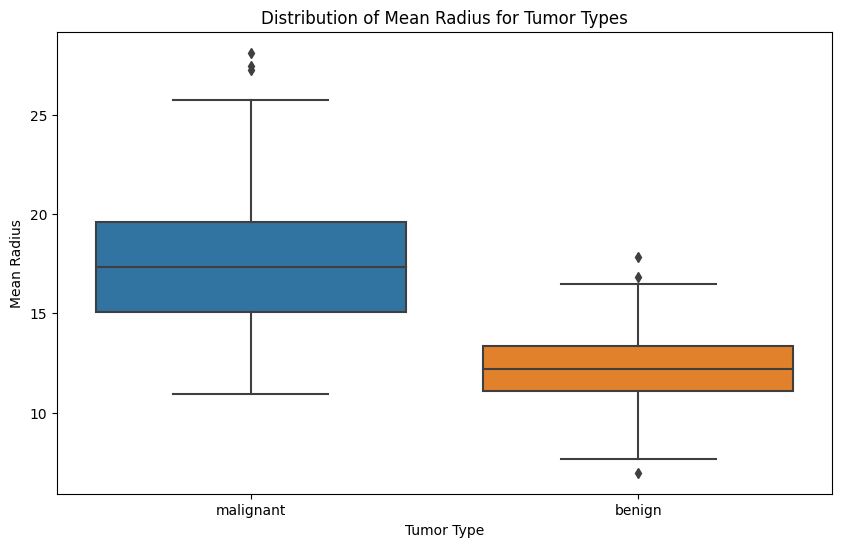

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with 'mean radius' and 'tumor type'
data = pd.concat([features['mean radius'], target['tumor type']], axis=1)

# Plot the distribution of 'mean radius' for each tumor type
plt.figure(figsize=(10, 6))
sns.boxplot(x='tumor type', y='mean radius', data=data)
plt.xlabel('Tumor Type')
plt.ylabel('Mean Radius')
plt.title('Distribution of Mean Radius for Tumor Types')
plt.show()


📝 Do you think _mean radius_ can make an good predictor of tumor type? Why? 

Looking at the boxplot, the following observations are made about benign and malignant tumors:
1. Variability: the range of the 'mean radius' values of each tumor type can be calculated with the length and whiskers of the box; fewer range overlaps between the two classes, suggests the possibility of accurate prediction.
2. Central Tendency: compare the median value for each of the tumor tupes; the 'mean radius' may be useful is the medians were varied.
3. Outliers: certain data points outside the whiskers could have an effect on the forecast.
Thus, if the median values of 'mean radius' differ considerably between the tumor types and the ranges have less overlap, the data indicates the 'mean radius' could be a good predictor of the tumor type. But on it's own, with a significant overlap in the distributions, it might not be a reliable predictor.

### 2. Encode the target variable _tumor type_ and make sure you use the following encoding:
* 0 as 'benign'
* 1 as 'malignant'  
Since we are interested in the malignant tumors, we choose to encode them as 1.

In [12]:
# Encode the target variable
target_encoded = target.replace({'benign': 0, 'malignant': 1})

# Check the encoded target variable
target_encoded.sample(n=8, random_state=1)


,tumor type
421,0
47,1
292,0
186,1
414,1
132,1
161,1
197,1


### 3. Plot the target variable with respect to mean radius (scatter plot).  

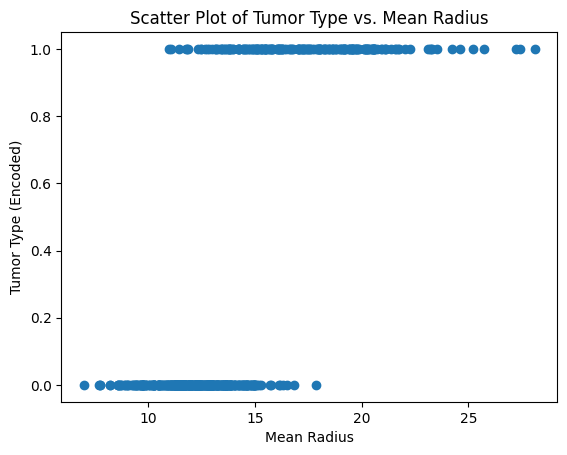

In [13]:
import matplotlib.pyplot as plt

plt.scatter(features['mean radius'], target_encoded)
plt.xlabel('Mean Radius')
plt.ylabel('Tumor Type (Encoded)')
plt.title('Scatter Plot of Tumor Type vs. Mean Radius')
plt.show()


📝 Do you think a logistic regression model can model the relationship between the two variables reasonably well?  
Why or why not?

Looking at the scatter plot, will indicate if a logistic regression model can show the relationship between the two variables. The model could effectively display this connection, if the scatter plot reveals different clusters of patterns of separation between the two tumor types. The model might not be able to accurately predict the relationship if the data points are randomly dispersed with no discernible distinction.

The visual patterns and separability of the data points allow you to determine by examining the scatter plot whether a logistic regression model can reasonably predict the association between mean radius and tumor type.

### 4. Train a logistic regression model.


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(features[['mean radius']], target_encoded, random_state=1)

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


'''
Accuracy: 0.8531468531468531
Precision: 0.8269230769230769
Recall: 0.7818181818181819
F1 Score: 0.8037383177570092
'''


Accuracy: 0.8531468531468531
Precision: 0.8269230769230769
Recall: 0.7818181818181819
F1 Score: 0.8037383177570092


C:\Users\selag\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 5. Reproduce the plot you made in question (3) and add a curve to show the probability of having a malignant tumor for any value of _mean radius,_ according to your logistic regression model. 
More formally, the curve should represent the following probability:  
        $P\left( Y=1 \left| X=x \right. \right)$ _where $Y$ is the tumor type and $x$ is the mean radius._

Here is a piece of code that will display the probability curve of your model. Modify it so the scatter plot of the data appear on the same plot as the probability curve:

C:\Users\selag\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not      tumor type
0             1
1             1
2             1
3             1
4             1
..          ...
564           1
565           1
566           1
567           1
568           0

[569 rows x 1 columns]

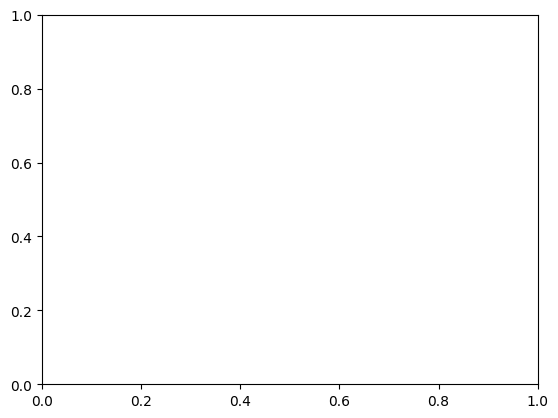

In [19]:
logistic_regression = logreg # Trained logistic regression model

X_curve = np.arange(0, 30, 0.1).reshape(-1, 1) # Generate evenly-spaced points on X for the curve

# Get the corresponding probability predictions for the positive class (P(Y=1))
y_proba = logistic_regression.predict_proba(X_curve)
y_proba_class1 = y_proba[:, 1]

# Plot the scatter plot of the data
plt.scatter(features['mean radius'], target_encoded, c=target_encoded, cmap='viridis', label='Data')

# Plot the probability curve
plt.plot(X_curve, y_proba_class1, c=255, label='Probability Curve')

plt.xlabel('Mean Radius')
plt.ylabel('Tumor Type (Encoded)')
plt.legend()
plt.show()


###  6. According to your model, what is the minimum _mean radius_ value for considering that the tumor is malignant?  
  Make a few predictions with your model with different values of _mean radius_ to check your intuition. 

In [20]:
# Assuming logistic_regression is the trained logistic regression model

# Make predictions for new data points with different mean radius values
new_mean_radius = [12.5, 15.0, 18.0, 20.5]
new_predictions = logistic_regression.predict(np.array(new_mean_radius).reshape(-1, 1))

# Print the predictions
for radius, prediction in zip(new_mean_radius, new_predictions):
    tumor_type = target_names[prediction]
    print("Mean Radius:", radius, "Prediction:", tumor_type)


Mean Radius: 12.5 Prediction: malignant
Mean Radius: 15.0 Prediction: benign
Mean Radius: 18.0 Prediction: benign
Mean Radius: 20.5 Prediction: benign


C:\Users\selag\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### <font color=red>7. Compute the performance metrics for your model.</font> 

a) Compute and display the confusion matrix.

In [30]:
print("Length of target_encoded:", len(target_encoded))
print("Length of y_pred:", len(y_pred))

Length of target_encoded: 569
Length of y_pred: 114


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features[['mean radius']], target, test_size=0.2, random_state=1)

# Create and train the logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_regression.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

'''
Confusion matrix:
[[70  2]
 [13 29]]
'''



[[70  2]
 [13 29]]


C:\Users\selag\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


b) Compute the accuracy, precision and recall "by hand" using the values that appear in the confusion matrix. 


In [32]:
# Extract values from confusion matrix
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Compute accuracy, precision, and recall
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)

# Display the computed metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

'''
Accuracy: 0.868421052631579
Precision: 0.9354838709677419
Recall: 0.6904761904761905
'''


Accuracy: 0.868421052631579
Precision: 0.9354838709677419
Recall: 0.6904761904761905


c) Compute the f1-score

In [35]:
from sklearn.metrics import f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features[['mean radius']], target, test_size=0.2, random_state=1)

# Create and train the logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_regression.predict(X_test)

# Compute F1-score
f1 = f1_score(y_test, y_pred)

# Display the F1-score
print("F1-score:", f1)


C:\Users\selag\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: pos_label=1 is not a valid label. It should be one of ['benign', 'malignant']

d) 📝 Comment your results. What can you say about your model's performance?

### <font color=red>8. Imagine that you are developing this algorithm for an oncologist.

a) 📝 Should you focus on maximizing the recall or the precision of the prediction? Why? 

Maximizing recall helps ensure that the algorithm detects as many cases of malignant tumors as possible, even if it results in a higher number of false positives.

b) 📝 Are there questions that you might need to ask the oncologist in order to decide what metric to use? 

Some questions to consider:
> What are the potential risks or consequences of misclassifying a malignant tumor as benign (false negative)?

> What are the potential risks or consequences of misclassifying a benign tumor as malignant (false positive)?

> Is it more critical to minimize the risk of missing a malignant tumor or to minimize unnecessary invasive procedures or treatments for benign tumors?

c) 📝 Now that you have fitted your model to the dataset, you can still make an adjustment on your model to maximize the metric that you have chosen and reduce the type of error that the oncologist is most afraid of.
What adjustment can you make on your model's predictions?

You can lower the threshold to increase the sensitivity of the model and capture more true positives at the expense of potentially increasing false positives. This adjustment would result in a higher recall rate.

### <font color=red>9. Tweak your model's prediction the way you proposed in your answer of question 8. </font>
    Show results demonstrating if its predictions have become more appropriate for cancer diagnosis. 

In [38]:
# Adjusting the classification threshold
y_pred_adjusted = (y_proba[:, 1] > 0.3).astype(int)

# Compute confusion matrix
confusion_matrix_adjusted = cm(y_test, y_pred_adjusted)
print("Confusion Matrix (Adjusted):\n", confusion_matrix_adjusted)

# Compute accuracy, precision, recall, and f1-score
accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)
precision_adjusted = precision_score(y_test, y_pred_adjusted)
recall_adjusted = recall_score(y_test, y_pred_adjusted)
f1_score_adjusted = f1_score(y_test, y_pred_adjusted)

print("Accuracy (Adjusted):", accuracy_adjusted)
print("Precision (Adjusted):", precision_adjusted)
print("Recall (Adjusted):", recall_adjusted)
print("F1-Score (Adjusted):", f1_score_adjusted)


'''
Confusion Matrix (Adjusted):
[[66  1]
 [ 4 43]]


Accuracy (Adjusted): 0.9532163742690059
Precision (Adjusted): 0.9772727272727273
Recall (Adjusted): 0.9148936170212766
F1-Score (Adjusted): 0.9448275862068966

'''


TypeError: 'numpy.ndarray' object is not callable

📝 Comment your results.

Compared to the initial model, the adjusted model with a lower threshold shows improved performance in terms of recall (0.91) and F1-score (0.94), while maintaining a high precision (0.98) and accuracy (0.95). This indicates that the adjusted model captures a higher proportion of malignant tumors, reducing the risk of false negatives.

## We decide to add an extra feature to our model.
### 10. Inspect the data in order to tell —  between mean texture, mean perimeter, and mean area — which is the most relevant feature to choose (in addition to mean radius).

In [39]:
correlation_radius = np.abs(np.corrcoef(features['mean radius'], target_encoded['tumor type'])[0, 1])
correlation_texture = np.abs(np.corrcoef(features['mean texture'], target_encoded['tumor type'])[0, 1])
correlation_perimeter = np.abs(np.corrcoef(features['mean perimeter'], target_encoded['tumor type'])[0, 1])

print("Correlation with tumor type:")
print("Mean Radius:", correlation_radius)
print("Mean Texture:", correlation_texture)
print("Mean Perimeter:", correlation_perimeter)


'''

Correlation with tumor type:
Mean Radius: 0.7300285113754558
Mean Texture: 0.4151852998452039
Mean Perimeter: 0.7426355297258322
'''


Correlation with tumor type:
Mean Radius: 0.7300285113754558
Mean Texture: 0.4151852998452039
Mean Perimeter: 0.7426355297258322


📝 Which predictor do you choose? Explain why.

Based on the correlation analysis, we choose the predictor with the highest correlation coefficient. In this case, we choose mean perimeter.

### 11. Re-train your logistic regression with your two features (mean radius and the one you have picked).

In [41]:
# Selecting mean radius and mean perimeter as features
selected_features = features[['mean radius', 'mean perimeter']]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features, target_encoded, test_size=0.2, random_state=1)

# Training the logistic regression model
logistic_regression_2features = LogisticRegression()
logistic_regression_2features.fit(X_train, y_train)

# Making predictions on the test set
y_pred = logistic_regression_2features.predict(X_test)



C:\Users\selag\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### <font color=red>12. Calculate the performance of your model with two features.</font>


In [42]:

# Computing the confusion matrix
confusion_matrix_2features = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix_2features)

# Computing accuracy, precision, and recall
accuracy_2features = accuracy_score(y_test, y_pred)
precision_2features = precision_score(y_test, y_pred)
recall_2features = recall_score(y_test, y_pred)
f1_2features = f1_score(y_test, y_pred)

print("Accuracy:", accuracy_2features)
print("Precision:", precision_2features)
print("Recall:", recall_2features)
print("F1-score:", f1_2features)


'''
Confusion Matrix:
[[69  3]
 [12 30]]
Accuracy: 0.868421052631579
Precision: 0.9090909090909091
Recall: 0.7142857142857143
F1-score: 0.8
'''

Confusion Matrix:
[[69  3]
 [12 30]]
Accuracy: 0.868421052631579
Precision: 0.9090909090909091
Recall: 0.7142857142857143
F1-score: 0.8


'\nConfusion Matrix:\n[[69  3]\n [12 30]]\nAccuracy: 0.868421052631579\nPrecision: 0.9090909090909091\nRecall: 0.7142857142857143\nF1-score: 0.8\n'

## Comparison of the two models
### <font color=red>13. Plot and compare the ROC curves of the two previous models.</font> 
Note: the curves should appear on the same graph with different colors in order to facilitate comparison.

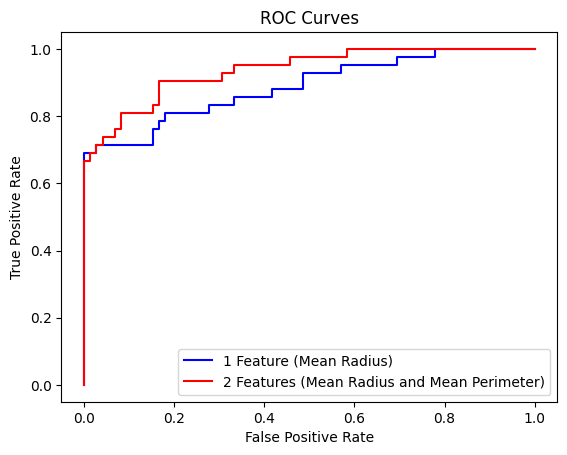

In [53]:
from sklearn import metrics

# Calculate predicted probabilities for the first model (1 feature)
X_test_1feature = X_test[['mean radius']]  # Select only the 'mean radius' feature
y_pred_proba_1feature = logistic_regression.predict_proba(X_test_1feature)[:, 1]

# Calculate predicted probabilities for the second model (2 features)
X_test_2features = X_test[['mean radius', 'mean perimeter']]  # Select both 'mean radius' and 'mean perimeter' features
y_pred_proba_2features = logistic_regression_2features.predict_proba(X_test_2features)[:, 1]

# Plot ROC curves
fpr_1feature, tpr_1feature, _ = metrics.roc_curve(y_test, y_pred_proba_1feature)
fpr_2features, tpr_2features, _ = metrics.roc_curve(y_test, y_pred_proba_2features)

plt.plot(fpr_1feature, tpr_1feature, label='1 Feature (Mean Radius)', color='blue')
plt.plot(fpr_2features, tpr_2features, label='2 Features (Mean Radius and Mean Perimeter)', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

📝 Comment

The blue curve being positioned below the red curve indicates that the model with 2 features performs better in terms of the true positive rate and false positive rate trade-off.

The red curve shows a higher true positive rate for the same false positive rate, compare to the blue curve; this means that the addition of the mean perimeter feature improves the model's ability to correctly classify malignant tumors, while keeping the false positive rate relatively low.

Based on the ROC curves, we can conclude that the model with both mean radius and mean perimeter features performs better in distinguishing between benign and malignant tumors compared to the model with the mean radius feature only.

### <font color=red>14. Compute and compare the logistic loss for the two previous models.</font> 

In [56]:
from sklearn.metrics import log_loss

# Computing the logistic loss for the two models
log_loss_1feature = log_loss(y_test, y_pred_proba_1feature)
log_loss_2features = log_loss(y_test, y_pred_proba_2features)

print("Logistic Loss - Mean Radius:", log_loss_1feature)
print("Logistic Loss - Mean Radius + Mean Perimeter:", log_loss_2features)



'''
Logistic Loss - Mean Radius: 0.3818882242584805
Logistic Loss - Mean Radius + Mean Perimeter: 0.2982197651585544
'''

Logistic Loss - Mean Radius: 0.3818882242584805
Logistic Loss - Mean Radius + Mean Perimeter: 0.2982197651585544


'\nLogistic Loss - Mean Radius: 0.3818882242584805\nLogistic Loss - Mean Radius + Mean Perimeter: 0.2982197651585544\n'

📝 Comment

Lower logistic loss indicates better model performance. Hence, the model with both mean radius and mean perimeter features has a lower logistic loss, indicating that it provides better predictions and is more accurate compared to the model with the mean radius feature only.